In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# 1.Setting the research and analysis goal
The aim is to classify iris flowers among three species (Setosa, Versicolor, or Virginica) from sepals' and petals' length and width measurements. The iris data set contains fifty instances of each of the three species. The central goal is to design a model that makes proper classifications for new flowers.

Attribute information:
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm
- species
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

# 2.Retrieving the Data

In [3]:
df= sb.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 3.Data Processing

### 1. Data Cleaning

In [4]:
#Null values cleaning if present
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

- There is no null values in iris dataset.

<AxesSubplot:>

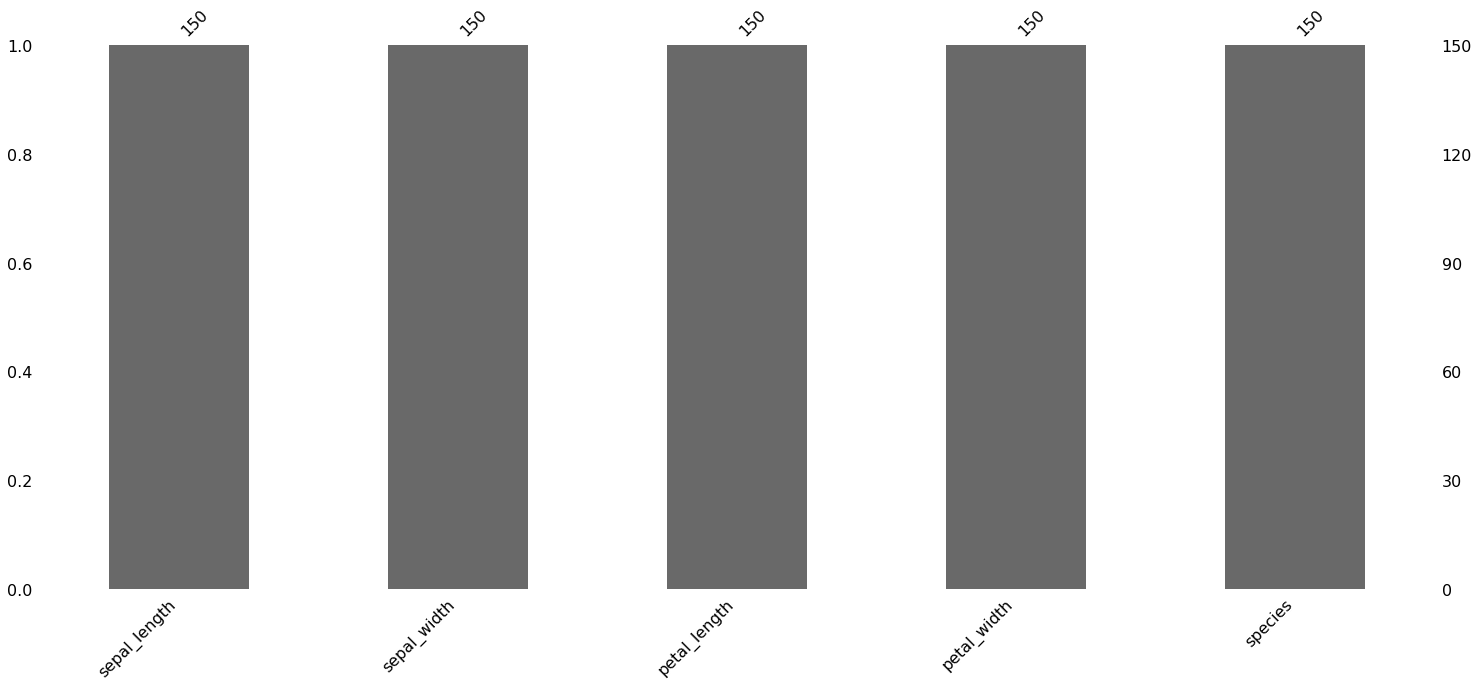

In [5]:
#Graphical representation of missing values
import missingno as msn
#1. Bar chart
msn.bar(df)

<AxesSubplot:>

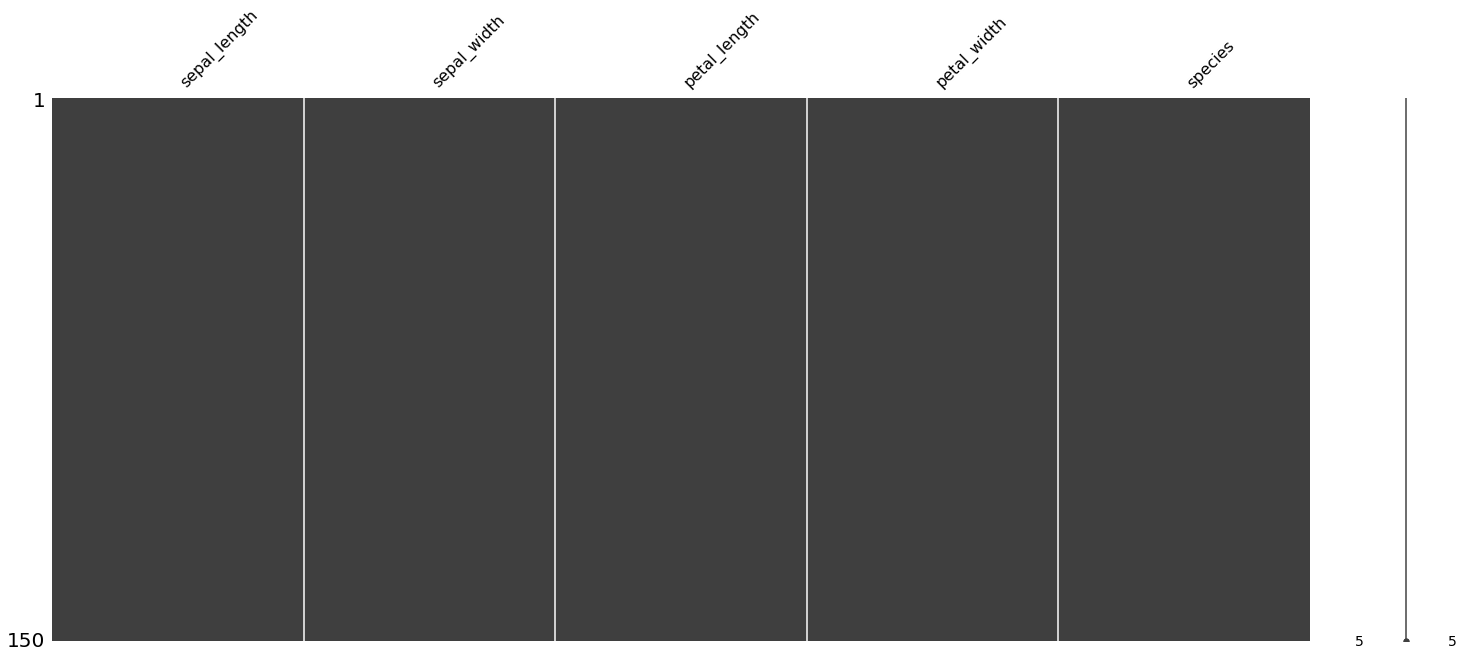

In [6]:
#2. Matrix plot
msn.matrix(df)

C:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

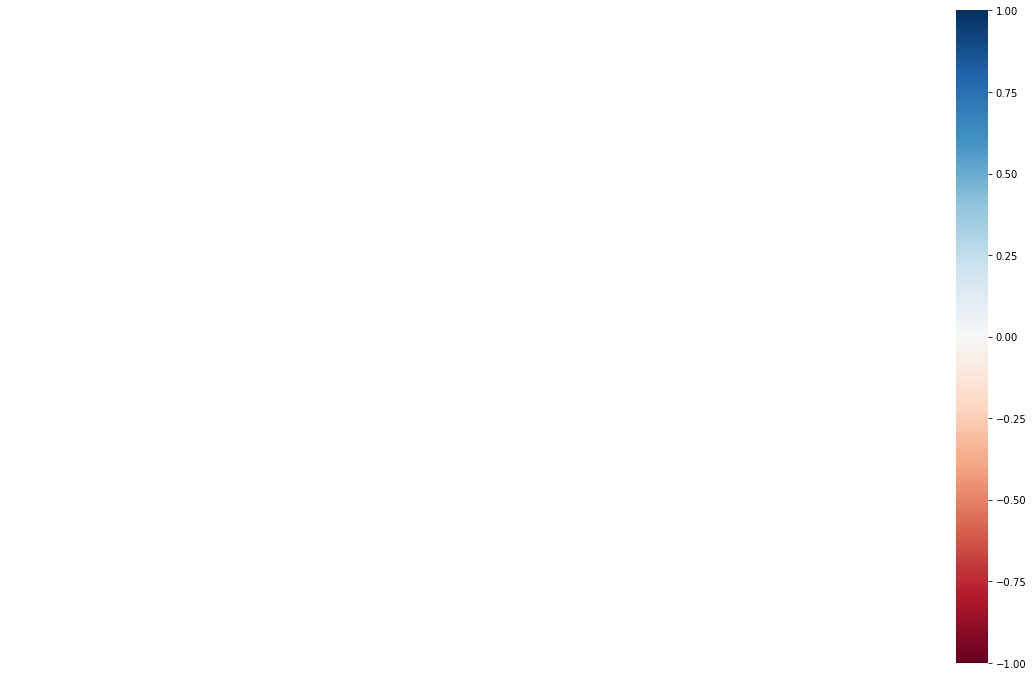

In [7]:
#3. heatmap plot
msn.heatmap(df)

- There is no missing values in iris dataset.

### 2.Exploratory Data Analysis

In [15]:
# Five number summary

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


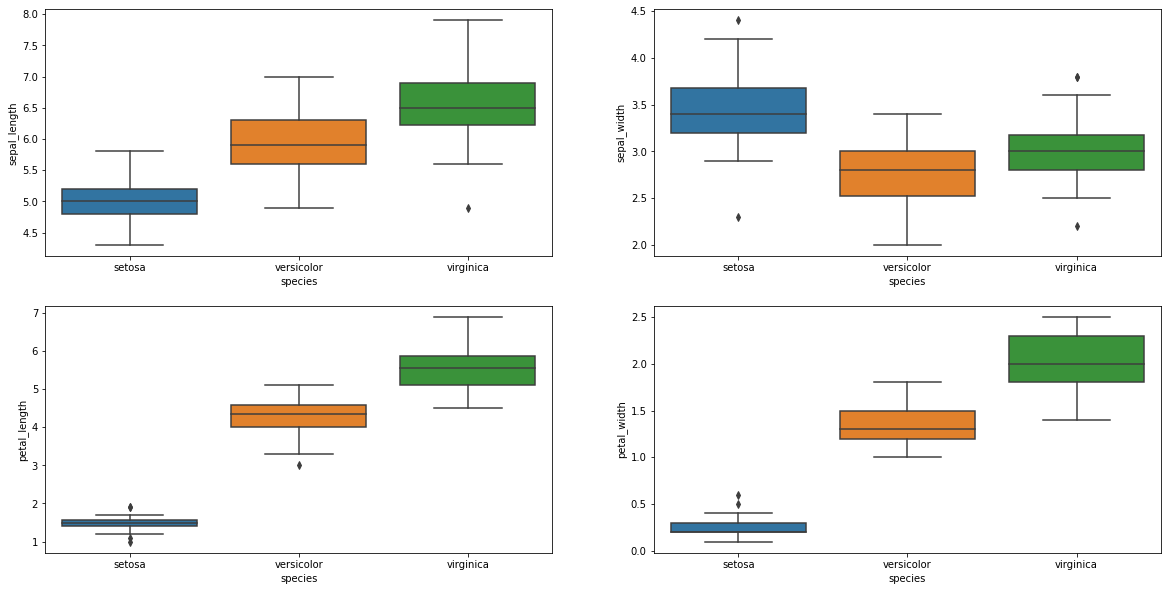

In [16]:
# Box plot
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sb.boxplot(x='species', y='sepal_length',data=df)
plt.subplot(2,2,2)
sb.boxplot(x='species', y='sepal_width',data=df)
plt.subplot(2,2,3)
sb.boxplot(x='species', y='petal_length',data=df)
plt.subplot(2,2,4)
sb.boxplot(x='species', y='petal_width',data=df)
plt.show()



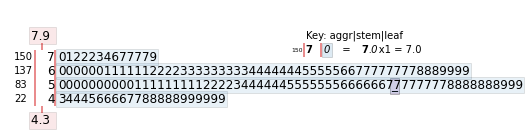

In [17]:
# Stem and leaf display
import stemgraphic as sg
fig,axis=sg.stem_graphic(df['sepal_length'],scale=1)

The leftmost column in the above plot is the frequency count. There are 22 observations in the range 4.0-5.0 and 61 observations in the range 5.0-6.0, which gives total of 83 observations in the range 4.0-6.0. Continuing in the same way, there is total of 150 observations which is at the top in the same column. Then after a vertical line, there are two values, one at bottom most we have 4.3. While at the topmost we have 7.9, these values are nothing but the minimum and maximum values respectively in the given dataset. After that, we have the stem values and following that we have leaves values separating stem by the vertical line.

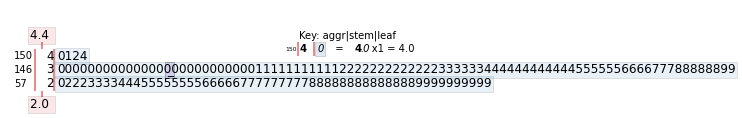

In [18]:
fig,axis=sg.stem_graphic(df['sepal_width'],scale=1)

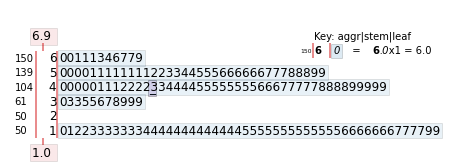

In [19]:
fig,axis=sg.stem_graphic(df['petal_length'],scale=1)

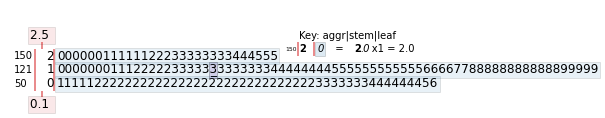

In [20]:
fig,axis=sg.stem_graphic(df['petal_width'],scale=1)

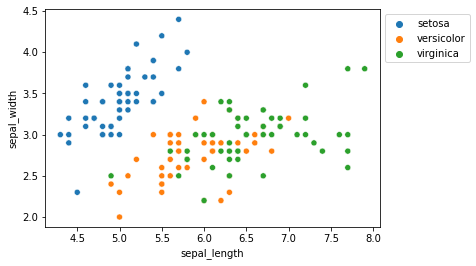

In [21]:
# Scatterplot 
sb.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)
plt.legend(bbox_to_anchor=(1,1),loc=2)#placing the legend outside the box.
plt.show()


- Species Setosa has smaller sepal lengths but larger sepal widths.
- Versicolor Species lies in between in terms of sepal length and width.
- Species Virginica has larger sepal lengths but smaller sepal widths.

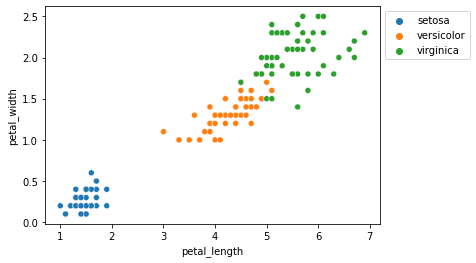

In [22]:
sb.scatterplot(x='petal_length',y='petal_width',hue='species',data=df)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()


- Species Setosa has smaller petal lengths and widths.
- Versicolor Species lies in between in terms of petal length and width.
- Species Virginica has the largest of petal lengths and widths.

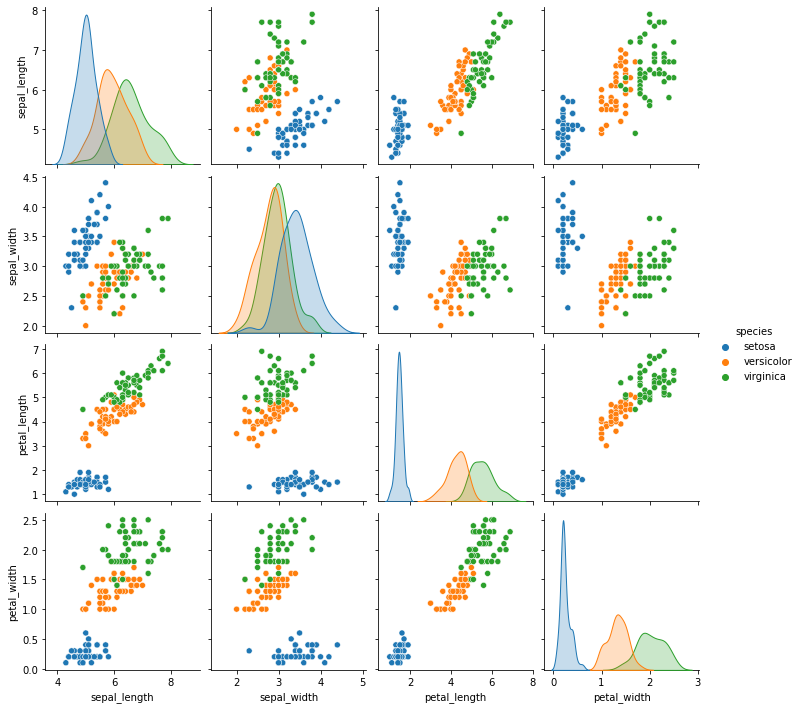

In [23]:
# Pair plot(Visualization of whole dataset)
sb.pairplot(df, hue='species')

In the density plot of petal length,Setosa species are well separated from Versicolor and Virginica, although there is some overlap between the Versicolor and Virginica.In the density plot of petal width,there is slight intersection between the Setosa and Versicolor species.
If we have to choose one feature for classification, we will pick petal length to distinguish among the species. If we have to select two features, then we will choose petal width as the second feature.


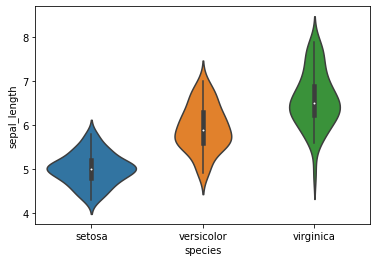

In [24]:
#violin plot
fig= sb.violinplot(y='sepal_length',x='species',data=df)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x25df6af6490>,
 'caps': [<matplotlib.lines.Line2D at 0x25df6af6a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x25df6af61c0>],
 'medians': [<matplotlib.lines.Line2D at 0x25df6af6fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25df6b022e0>],
 'means': []}

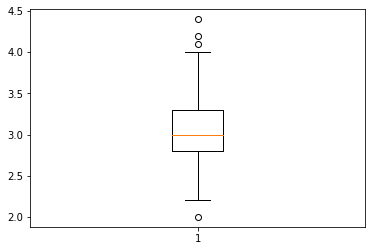

In [25]:
#Removing Outliers
plt.boxplot(df['sepal_width'])

In [26]:
Q1=df['sepal_width'].quantile(0.25)
Q3=df['sepal_width'].quantile(0.75)
IQR=Q3-Q1
print(df.shape)
upper_limit=np.where(df['sepal_width']>=Q3+1.5*IQR)
lower_limit=np.where(df['sepal_width']<=Q1-1.5*IQR)

df.drop(upper_limit[0],inplace=True)
df.drop(lower_limit[0],inplace=True)
print(df.shape)


(150, 5)
(146, 5)


{'whiskers': [<matplotlib.lines.Line2D at 0x25df6b48dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x25df6b583a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25df6b48af0>],
 'medians': [<matplotlib.lines.Line2D at 0x25df6b58940>],
 'fliers': [<matplotlib.lines.Line2D at 0x25df6b58c10>],
 'means': []}

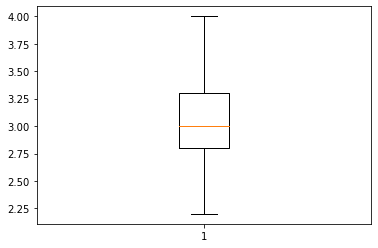

In [27]:
#checking whether outliers are removed or not
plt.boxplot(df['sepal_width'])

## Corelation

<AxesSubplot:>

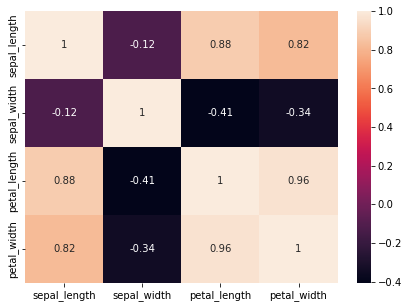

In [28]:
correlation=df.corr()
fig,ax=plt.subplots(figsize=(7,5))
sb.heatmap(correlation,annot=True,ax=ax)

- Petal length and petal width have high positive correlation of 0.96
- If petal length value increases, petal width also increases
- Sepal length have high positive correlation with petal length and petal width
- Sepal width have negative correlation with petal length and petal width



## Writing DataFrame to CSV File

In [29]:
#df.to_csv('c:/Users/user/CleanedIris.csv')

# 4.Data Modeling

## Feature Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
lsp=LabelEncoder()
df['species']=lsp.fit_transform(df['species'])
#fitted =lsp.fit_transform(df.species)
#df['target']=fitted
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Label Encoding is a popular encoding technique for handling categorical variables.It converts the labels into numeric form so as to convert it into the machine-readable form.
- Here,
 - Iris-setosa -->0
 - Iris-versicolor -->1
 - Iris-virginica -->2


## Machine Learning

In [31]:
# Splitting dataset into features and targets
x=df.drop(columns=['species'])
y=df['species']

In [32]:
from sklearn.model_selection import train_test_split

#Spliting the datset for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

Using train_test_split we split the whole data into training and testing datasets. Later we’ll use the testing dataset to check the accuracy of the model.

##### Logistic Regression

In [33]:
#Creating the classifier object
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()

- Here we imported a logistic regression from the scikit-learn linear model.
- Then, we created an object and named it model1.

In [34]:
#Fitting our model into classifier object

model1.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

- After that, we feed the training dataset into the algorithm by using the model1.fit() method.

In [35]:
#Making the prediction using splitted test dataset

prediction1=model1.predict(x_test)

- Now we predict the classes from the test dataset using our trained model.

In [36]:
#Measuring the accuracy of our model
from sklearn.metrics import accuracy_score

accuracy_score(y_test,prediction1)

0.9318181818181818

- Then we check the accuracy score of the predicted classes.
- accuracy_score() takes true values and predicted values and returns the percentage of accuracy.

##### K-nearest neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

model2= KNeighborsClassifier()
model2.fit(x_train,y_train)
prediction2= model1.predict(x_test)
accuracy_score(y_test,prediction2)

0.9318181818181818

##### Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
prediction3=model3.predict(x_test)
accuracy_score(y_test,prediction3)

0.9318181818181818

##### Support Vector Machine(SVM)

In [39]:
from sklearn.svm import SVC

model4=SVC()
model4.fit(x_train,y_train)
prediction4=model4.predict(x_test)
accuracy_score(y_test,prediction4)

0.9545454545454546

In [41]:
#Testing the model
x_new= np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
prediction_new=model4.predict(x_new)
print("Prediction of Species: {}".format(prediction_new))

Prediction of Species: [0 1 2]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



- Support Vector Machine is giving very good accuracy as compared to other models.
- Here we take some random values to see if the model can predict accurately.
- Output-It looks like the model is predicting correctly because the setosa is shortest and virginica is the longest and versicolor is in between these two.